<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/bi_ls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-19-d19ce2d20660>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [20]:


X = df['text']
y = df['label']

In [21]:
vocab_size= 20000
from tensorflow.keras.preprocessing.text import one_hot
encoding = [one_hot(d,vocab_size) for d in df['text']]

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
emb_doc = pad_sequences(encoding,padding='pre',maxlen=50)


In [23]:
import numpy as np
final_x = np.array(emb_doc)
final_y = np.array(y)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, output_dim=32, input_length=50))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                8480      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 6)                 246       
                                                                 
 dense_7 (Dense)             (None, 4)                 28        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 648759 (2.47 MB)
Trainable params: 648759 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [27]:


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.20, random_state=42)

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)



In [28]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64)

Epoch 1/10
25/25 [==============================] - 12s 274ms/step - loss: 0.6903 - accuracy: 0.5006 - val_loss: 0.6822 - val_accuracy: 0.4975
Epoch 2/10
25/25 [==============================] - 3s 138ms/step - loss: 0.6455 - accuracy: 0.5800 - val_loss: 0.5948 - val_accuracy: 0.7800
Epoch 3/10
25/25 [==============================] - 2s 91ms/step - loss: 0.5066 - accuracy: 0.8225 - val_loss: 0.4995 - val_accuracy: 0.8300
Epoch 4/10
25/25 [==============================] - 2s 74ms/step - loss: 0.4087 - accuracy: 0.9137 - val_loss: 0.5186 - val_accuracy: 0.7875
Epoch 5/10
25/25 [==============================] - 3s 107ms/step - loss: 0.3624 - accuracy: 0.9656 - val_loss: 0.5124 - val_accuracy: 0.8025
Epoch 6/10
25/25 [==============================] - 2s 73ms/step - loss: 0.3371 - accuracy: 0.9869 - val_loss: 0.5044 - val_accuracy: 0.8200
Epoch 7/10
25/25 [==============================] - 1s 30ms/step - loss: 0.3214 - accuracy: 0.9900 - val_loss: 0.5391 - val_accuracy: 0.8150
Epoch 8/1

In [29]:

model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.5656 - accuracy: 0.8200


[0.5656431317329407, 0.8199999928474426]

In [30]:
model.evaluate(x_train, y_train)

50/50 [==============================] - 0s 5ms/step - loss: 0.2906 - accuracy: 0.9950


[0.29056158661842346, 0.9950000047683716]

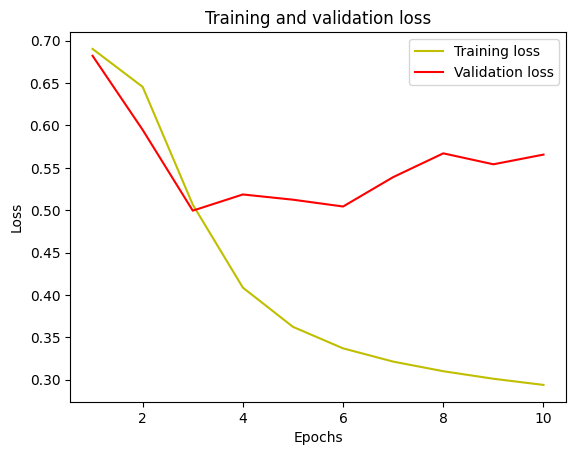

In [31]:

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

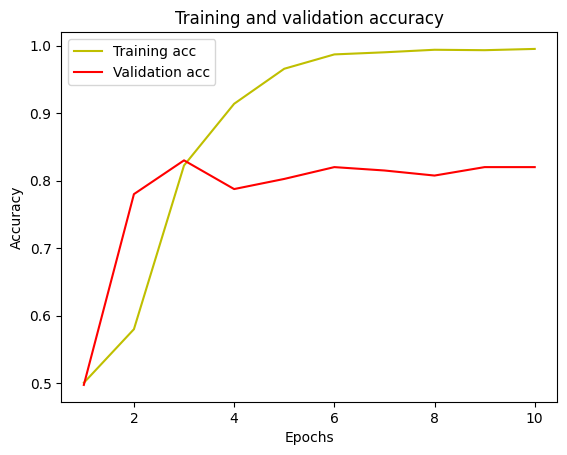

In [32]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()